In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import datetime as dat
import matplotlib as plt
import datetime as dt
import xgboost as xgb
from collections import Counter
%matplotlib inline
sns.set()

In [ ]:
features_ventana1 = pd.read_csv('../xgb/features_auctions_lucas_ventana1.csv',low_memory=False).set_index('ref_hash')
aux_ventana1 = pd.read_csv('../xgb/features_events_lucas_ventana1.csv').set_index('ref_hash')
features_ventana1=features_ventana1.join(aux_ventana1, how = 'outer', lsuffix = '_auctions', rsuffix = '_events')
aux_ventana1 = pd.read_csv('../xgb/features_installs_lucas_ventana1.csv').set_index('ref_hash')
features_ventana1=features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_installs')
aux_ventana1 = pd.read_csv('../xgb/features_clicks_lucas_ventana1.csv').set_index('ref_hash')
features_ventana1=features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_clicks')
features_ventana1.columns
features_ventana1[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']]=features_ventana1[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']].fillna(259200)#3 dias pasado a segundos
#features_ventana1 = features_ventana1.fillna(0)

labels_st_ventana1 = pd.read_csv('../xgb/labels_st_ventana1.csv').set_index('device_id')
ventana1 = features_ventana1.join(labels_st_ventana1, how = 'left')#.fillna(259200)#3 dias pasado a segundos
#ventana1['tiempo_hasta_aparicion']=ventana1['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
features_ventana1.head()

ventana1_no_conversion=ventana1.loc[ventana1['tiempo_hasta_aparicion'].isna()].copy()#personas que no convirtieron en esa ventana
ventana1_conversion=ventana1.loc[np.logical_not(ventana1['tiempo_hasta_aparicion'].isna())].copy()

In [ ]:
tamanio_muestra_ventana1=ventana1_no_conversion.shape[0]
ventana1_no_conversion['tiempo_hasta_aparicion']=ventana1_no_conversion['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
ventana1_no_conversion=ventana1_no_conversion.sample(n=int(tamanio_muestra_ventana1*0.05), replace=True, random_state=662)
ventana1=ventana1_conversion.append(ventana1_no_conversion)

In [ ]:
ventana1_no_conversion.head()

In [ ]:
#pd.read_csv('../xgb/labels_st_ventana1.csv')

In [ ]:
features_ventana2 = pd.read_csv('../xgb/features_auctions_lucas_ventana2.csv',low_memory=False).set_index('ref_hash')
aux_ventana2 = pd.read_csv('../xgb/features_events_lucas_ventana2.csv').set_index('ref_hash')
features_ventana2=features_ventana2.join(aux_ventana2, how = 'outer', lsuffix = '_auctions', rsuffix = '_events')
aux_ventana2 = pd.read_csv('../xgb/features_installs_lucas_ventana2.csv').set_index('ref_hash')
features_ventana2=features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_installs')
aux_ventana2 = pd.read_csv('../xgb/features_clicks_lucas_ventana2.csv').set_index('ref_hash')
features_ventana2=features_ventana2.join(aux_ventana2, how = 'left', rsuffix = '_clicks')


features_ventana2[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']]=features_ventana2[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']].fillna(259200)#3 dias pasado a segundos
#features_ventana2 = features_ventana2.fillna(0)

labels_st_ventana2 = pd.read_csv('../xgb/labels_st_ventana2.csv').set_index('device_id')
ventana2 = features_ventana2.join(labels_st_ventana2, how = 'left')#.fillna(259200)#3 dias pasado a segundos
#ventana2['tiempo_hasta_aparicion']=ventana2['tiempo_hasta_aparicion'].fillna(259200)

ventana2_no_conversion=ventana2.loc[ventana2['tiempo_hasta_aparicion'].isna()].copy()#personas que no convirtieron en esa ventana
ventana2_conversion=ventana2.loc[np.logical_not(ventana2['tiempo_hasta_aparicion'].isna())].copy()

tamanio_muestra_ventana2=ventana2_conversion.shape[0]
ventana2_no_conversion['tiempo_hasta_aparicion']=ventana2_no_conversion['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
ventana2_no_conversion=ventana2_no_conversion.sample(n=int(tamanio_muestra_ventana2*0.05), replace=True, random_state=662)
ventana2=ventana2_conversion.append(ventana2_no_conversion)


In [ ]:
features_ventana3 = pd.read_csv('../xgb/features_auctions_lucas_ventana3.csv',low_memory=False).set_index('ref_hash')
aux_ventana3 = pd.read_csv('../xgb/features_events_lucas_ventana3.csv').set_index('ref_hash')
features_ventana3=features_ventana3.join(aux_ventana3, how = 'outer', lsuffix = '_auctions', rsuffix = '_events')
aux_ventana3 = pd.read_csv('../xgb/features_installs_lucas_ventana3.csv').set_index('ref_hash')
features_ventana3=features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_installs')
aux_ventana3 = pd.read_csv('../xgb/features_clicks_lucas_ventana3.csv').set_index('ref_hash')
features_ventana3=features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_clicks')


features_ventana3.columns
features_ventana3[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']]=features_ventana3[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']].fillna(259200)#3 dias pasado a segundos
#features_ventana3 = features_ventana3.fillna(0)

labels_st_ventana3 = pd.read_csv('../xgb/labels_st_ventana3.csv').set_index('device_id')
ventana3 = features_ventana3.join(labels_st_ventana3, how = 'left')#.fillna(259200)#3 dias pasado a segundos
#ventana3['tiempo_hasta_aparicion']=ventana3['tiempo_hasta_aparicion'].fillna(259200)


ventana3_no_conversion=ventana3.loc[ventana3['tiempo_hasta_aparicion'].isna()].copy()#personas que no convirtieron en esa ventana
ventana3_conversion=ventana3.loc[np.logical_not(ventana3['tiempo_hasta_aparicion'].isna())].copy()

tamanio_muestra_ventana3=ventana3_conversion.shape[0]
ventana3_no_conversion['tiempo_hasta_aparicion']=ventana3_no_conversion['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
ventana3_no_conversion=ventana3_no_conversion.sample(n=int(tamanio_muestra_ventana3*0.05), replace=True, random_state=662)
ventana3=ventana3_conversion.append(ventana3_no_conversion)

In [ ]:
features_ventana4 = pd.read_csv('../xgb/features_auctions_lucas_ventana4.csv',low_memory=False).set_index('ref_hash')
aux_ventana4 = pd.read_csv('../xgb/features_events_lucas_ventana4.csv').set_index('ref_hash')
features_ventana4=features_ventana4.join(aux_ventana4, how = 'outer', lsuffix = '_auctions', rsuffix = '_events')
aux_ventana4 = pd.read_csv('../xgb/features_installs_lucas_ventana4.csv').set_index('ref_hash')
features_ventana4=features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_installs')
aux_ventana4 = pd.read_csv('../xgb/features_clicks_lucas_ventana4.csv').set_index('ref_hash')
features_ventana4=features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_clicks')


features_ventana4[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']]=features_ventana4[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']].fillna(259200)#3 dias pasado a segundos

#features_ventana4 = features_ventana4.fillna(0)

labels_st_ventana4 = pd.read_csv('../xgb/labels_st_ventana4.csv').set_index('device_id')
ventana4 = features_ventana4.join(labels_st_ventana4, how = 'left')#.fillna(259200)#3 dias pasado a segundos

ventana4_no_conversion=ventana4.loc[ventana4['tiempo_hasta_aparicion'].isna()].copy()#personas que no convirtieron en esa ventana
ventana4_conversion=ventana4.loc[np.logical_not(ventana4['tiempo_hasta_aparicion'].isna())].copy()
ventana4_no_conversion['tiempo_hasta_aparicion']=ventana4_no_conversion['tiempo_hasta_aparicion']#.fillna(259200)#3 dias pasado a segundos
ventana4_no_conversion=ventana4_no_conversion.sample(frac=0.1, replace=True, random_state=662)
ventana4=ventana4_conversion.append(ventana4_no_conversion)




ventana4_no_conversion=ventana4.loc[ventana4['tiempo_hasta_aparicion'].isna()].copy()#personas que no convirtieron en esa ventana
ventana4_conversion=ventana4.loc[np.logical_not(ventana4['tiempo_hasta_aparicion'].isna())].copy()

tamanio_muestra_ventana4=ventana4_conversion.shape[0]
tamanio_muestra_ventana4
ventana4_no_conversion['tiempo_hasta_aparicion']=ventana4_no_conversion['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
ventana4_no_conversion=ventana4_no_conversion.sample(n=int(tamanio_muestra_ventana4*0.1+1), replace=True, random_state=662)
ventana4=ventana4_conversion.append(ventana4_no_conversion)
ventana4_no_conversion.shape[0]

In [ ]:
#matriz = ventana1.append(ventana4,sort=False).reset_index('ref_hash')
matriz = ventana1.append(ventana2,sort=False).append(ventana3,sort=False).append(ventana4,sort=False).reset_index('ref_hash')
matriz=matriz.drop(['attributed_min','attributed_max'],axis=1)
#matriz.columns

In [10]:
matriz.head()
mean_prediction=matriz['tiempo_hasta_aparicion'].mean()
mean_prediction

In [11]:
filas = matriz.shape[0]
matriz.head()


In [12]:
#matriz=matriz.drop(['attributed_min','attributed_max,application_id_max,application_id_mean,'],axis=1)
matriz=matriz.drop('ref_hash',axis=1)
features = matriz.iloc[:,:-1]
features.head()


,hour_sum_auctions,hour_mean_auctions,hour_std_auctions,hour_min_auctions,hour_max_auctions,tiempo_desde_inicio_de_ventana_sum,tiempo_desde_inicio_de_ventana_mean,tiempo_desde_inicio_de_ventana_std,tiempo_desde_inicio_de_ventana_min,tiempo_desde_inicio_de_ventana_max,...,hour_sum_clicks,hour_mean_clicks,hour_std_clicks,hour_min_clicks,hour_max_clicks,repeticiones_sum_clicks,repeticiones_mean_clicks,repeticiones_std_clicks,repeticiones_min_clicks,repeticiones_max_clicks
0,262546.0,37506.571429,32711.731111,11871.0,84877.0,1.126550e+06,160935.721167,70802.599949,60166.331894,257677.264901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2557316.0,53277.416667,9221.332601,9576.0,58033.0,2.902939e+06,60477.901544,26439.934566,54290.380240,230833.606475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,879313.0,67639.461538,11518.707115,51449.0,80391.0,1.484119e+06,114163.007774,68866.738196,58572.637969,227124.216926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1166126.0,33317.885714,29254.773979,4460.0,86349.0,6.350143e+06,181432.653629,28618.246742,147419.989802,259149.925223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3730753.0,81103.326087,10947.631364,8473.0,82962.0,7.705175e+06,167503.795431,10947.580825,94873.801839,169362.295545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
labels = matriz.iloc[:,-1]

data_dmatrix = xgb.DMatrix(data=features,label=labels)
labels.head()

0        88.851558
1    164703.549846
2    245538.096215
3       115.159507
4     99654.445592
Name: tiempo_hasta_aparicion, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, test_size=0.15, random_state=662)

test_features.head()

,hour_sum_auctions,hour_mean_auctions,hour_std_auctions,hour_min_auctions,hour_max_auctions,tiempo_desde_inicio_de_ventana_sum,tiempo_desde_inicio_de_ventana_mean,tiempo_desde_inicio_de_ventana_std,tiempo_desde_inicio_de_ventana_min,tiempo_desde_inicio_de_ventana_max,...,hour_sum_clicks,hour_mean_clicks,hour_std_clicks,hour_min_clicks,hour_max_clicks,repeticiones_sum_clicks,repeticiones_mean_clicks,repeticiones_std_clicks,repeticiones_min_clicks,repeticiones_max_clicks
609567,48831.0,16277.000000,1129.297127,14973.0,16929.0,4.883190e+04,16277.301592,1129.484538,14973.085237,16929.719345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207966,3680448.0,39153.702128,32701.098745,757.0,85606.0,1.059249e+07,112686.097716,100531.539824,757.708047,258406.223927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175513,69883.0,34941.500000,26614.792137,16122.0,53761.0,1.562845e+05,78142.236961,34479.004541,53761.899042,102522.574881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699844,616692.0,36276.000000,29753.224426,117.0,71422.0,1.912701e+06,112511.799774,77470.739975,2030.851162,240952.161235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433254,1730559.0,49444.542857,14865.745102,22727.0,59310.0,4.840978e+06,138313.669477,78856.075570,59031.314881,227143.401277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#intentar usar objetive survival:cox
xg_reg = xgb.XGBRegressor(objective ='reg:linear', base_score=0.5,
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 25, alpha = 10, n_estimators = 55,n_jobs=10)#RMSE: 70756.895396

In [16]:
xg_reg.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=25, min_child_weight=1, missing=None, n_estimators=55,
       n_jobs=10, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [17]:
predicted_labels = xg_reg.predict(test_features)

In [18]:
predicted_labels.max()

257626.56

In [19]:
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print("RMSE: %f" % (rmse))

RMSE: 70803.018629


In [20]:
#guardar boost
import pickle
pickle.dump(xg_reg, open("xgboost_survival1.dat", "wb"))

In [76]:
xg_reg = xgb.XGBRegressor(objective ='survival:cox', base_score=0.5,
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000,n_jobs=10)

In [77]:
xg_sur2.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=10, nthread=None, objective='survival:cox', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [78]:
predicted_labels2 = xg_sur2.predict(test_features)

In [24]:
predicted_labels2.max()

724553.56

In [27]:
predicted_labels2=list(predicted_labels2)


In [28]:
def limitador(x):
    if x > 259200:
        x = 259200
    return x



#predicted_labels2=predicted_labels2.map(limitador)
predicted=list(map( limitador,predicted_labels2))
predicted=np.asarray(predicted)

In [30]:
predicted.min()

0.06799175590276718

In [ ]:
predicted.max()

In [31]:
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels2))
print("RMSE: %f" % (rmse))

RMSE: 113523.075829


In [32]:
rmse = np.sqrt(mean_squared_error(test_labels,predicted ))
print("RMSE: %f" % (rmse))

In [35]:
rmse = np.sqrt(mean_squared_error(test_labels,(predicted+predicted_labels)/2 ))
print("RMSE: %f" % (rmse))

In [54]:
xg_reg2 = xgb.XGBRegressor(objective ='reg:linear', base_score=0.5,
                colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 15, alpha = 10, n_estimators = 25,n_jobs=10)

In [38]:
xg_reg2.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=25,
       n_jobs=10, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
predicted_labels3 = xg_reg2.predict(test_features)

In [50]:
rmse = np.sqrt(mean_squared_error(test_labels,predicted_labels3 ))
print("RMSE: %f" % (rmse))

RMSE: 70998.525583


In [52]:
rmse = np.sqrt(mean_squared_error(test_labels,(predicted_labels+predicted_labels3)/2 ))
print("RMSE: %f" % (rmse))

In [57]:
xg_reg3 = xgb.XGBRegressor(objective ='reg:linear', base_score=0.5,
                colsample_bytree = 0.3, learning_rate = 0.,
                max_depth = 5, alpha = 10, n_estimators = 5,n_jobs=10)

In [58]:
xg_reg3.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=5,
       n_jobs=10, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [59]:
predicted_labels4 = xg_reg3.predict(test_features)

In [67]:
rmse = np.sqrt(mean_squared_error(test_labels,predicted_labels4 ))
print("RMSE: %f" % (rmse))

RMSE: 71326.489834


In [62]:
rmse = np.sqrt(mean_squared_error(test_labels,(predicted_labels4+predicted_labels)/2 ))
print("RMSE: %f" % (rmse))

In [68]:
rmse = np.sqrt(mean_squared_error(test_labels,(predicted_labels4+predicted_labels+predicted_labels3+predicted_labels)/4 ))
print("RMSE: %f" % (rmse))

RMSE: 70286.809332


In [72]:
xg_reg4 = xgb.XGBRegressor(objective ='reg:linear',booster='gblinear', base_score=0.5,
                colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 15, alpha = 10, n_estimators = 65,n_jobs=10)

In [73]:
xg_reg4.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gblinear',
       colsample_bylevel=1, colsample_bytree=0.3, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=65, n_jobs=10,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [74]:
predicted_labels5 = xg_reg4.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_labels,predicted_labels5 ))
print("RMSE: %f" % (rmse))

In [75]:
rmse = np.sqrt(mean_squared_error(test_labels,(predicted_labels4+predicted_labels+predicted_labels3+predicted_labels5)/4 ))
print("RMSE: %f" % (rmse))

RMSE: 70599.529327


## Importancia de los features (cuantas veces aparecen en los árboles)

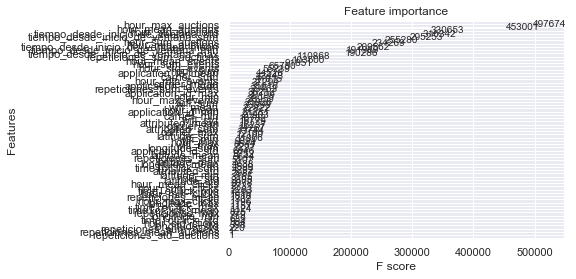

In [41]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 11]
plt.show()

In [42]:
features_ventana7 = pd.read_csv('../xgb/features_auctions_lucas_ventana7.csv',low_memory=False).set_index('ref_hash')
aux_ventana7 = pd.read_csv('../xgb/features_events_lucas_ventana7.csv').set_index('ref_hash')
features_ventana7=features_ventana7.join(aux_ventana7, how = 'outer', lsuffix = '_auctions', rsuffix = '_events')
aux_ventana7 = pd.read_csv('../xgb/features_installs_lucas_ventana7.csv').set_index('ref_hash')
features_ventana7=features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_installs')
aux_ventana7 = pd.read_csv('../xgb/features_clicks_lucas_ventana7.csv').set_index('ref_hash')
features_ventana7=features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_clicks')

labels_ventana7 = pd.read_csv('../xgb/base_target_st.csv').set_index('ref_hash')
target = labels_ventana7
features_ventana7[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']]=features_ventana7[['tiempo_desde_inicio_de_ventana_sum','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_std','tiempo_desde_inicio_de_ventana_min','tiempo_desde_inicio_de_ventana_max']].fillna(259200)#3 dias pasado a segundos

ventana7 = features_ventana7.join(labels_ventana7, how = 'right').fillna(0).reset_index().rename(index=str, columns={"device_id": "ref_hash"}) #3 dias pasado a segundos
ventana7.head()

,ref_hash,hour_sum_auctions,hour_mean_auctions,hour_std_auctions,hour_min_auctions,hour_max_auctions,tiempo_desde_inicio_de_ventana_sum,tiempo_desde_inicio_de_ventana_mean,tiempo_desde_inicio_de_ventana_std,tiempo_desde_inicio_de_ventana_min,...,hour_mean_clicks,hour_std_clicks,hour_min_clicks,hour_max_clicks,repeticiones_sum_clicks,repeticiones_mean_clicks,repeticiones_std_clicks,repeticiones_min_clicks,repeticiones_max_clicks,obj
0,1000169251625791246,530482.0,40806.307692,30043.019845,11589.0,82942.0,2.258488e+06,173729.838532,56244.421557,76114.647428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1000395625957344683,818887.0,54592.466667,26368.167434,8034.0,78292.0,1.510095e+06,100672.999900,66132.578015,8034.974209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1003027494996471685,5068976.0,30172.476190,21642.865681,12171.0,62346.0,8.265861e+06,49201.555411,35972.891673,12171.691046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1006670001679961544,194810.0,64936.666667,69.082077,64857.0,64980.0,5.404113e+05,180137.098730,99834.968999,64857.606340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1007573308966476713,390331.0,55761.571429,30075.672211,13286.0,82613.0,7.359344e+05,105133.480786,80906.269648,18726.239096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [43]:
features_ventana7 = ventana7.iloc[:,:-1]
labels_ventana7 = ventana7.iloc[:,-1]

In [44]:
data_dmatrix = xgb.DMatrix(data=features,label=labels)

In [45]:
features_ventana7=features_ventana7.drop(['attributed_min','attributed_max','ref_hash'],axis=1)
predicted_target_labels = xg_reg.predict(features_ventana7)

In [46]:
target.shape

(4037, 1)

In [47]:
target['obj'] = predicted_target_labels

In [48]:
target=target.sort_values(by='obj')

In [49]:
target.to_csv('../xgb/target_st.csv')